In [126]:
#Importem totes les llibreries necessaries per dur a terme el projecte.
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from vega_datasets import data

In [167]:
#Importem el dataset que analitzarem en aquesta pràctica
btc = pd.read_csv('BitCoin.csv',decimal='.')
btc.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [128]:
#contem el número de valors nulls a cada fila
btc.isnull().sum(axis = 0)
#Eliminem els valors nulls de cada fila. Veiem que la nova len es menor, per tant ha eliminat les columnes nules.
btc = btc.dropna(how='any',axis=0)
btc=btc.reset_index(drop=True)
len(btc)
#També hem vist que la data está en format string i parialment separada per "/" o "-", la estandaritzem per
#transformar-la a continuació.
for i,j in enumerate(btc['Date']):
    btc.loc[i,'Date'] = j.replace('-','/')
#Fem la transformació
btc['Date'] = btc['Date'].astype('datetime64[ns]')

In [129]:
#Definim els períodes de temps especificats, escollim un dia random per separar el post perimer i pre segon halving
halving1 = '2012-11-28'
halving2 = '2016-07-09'
pre_1st_halv = pd.date_range(min(btc['Date']), halving1)
post_1st_halv = pd.date_range(halving1,'2015-04-09')
pre_2nd_halv = pd.date_range('2015-04-10',halving2)
post_2nd_halv = pd.date_range(halving2,max(btc['Date']))


In [130]:
#Afegim columnes per identificarlos de forma sencilla i eficient
for i,j in enumerate(btc['Date']):
    if j in pre_1st_halv:
        btc.loc[i,'Time_period'] = 'Pre 1st Halving'
        btc.loc[i,'Pre/Post Halving'] = 'Pre Halving'
    elif j in post_1st_halv:
        btc.loc[i,'Time_period'] = 'Post 1st Halving'
        btc.loc[i,'Pre/Post Halving'] = 'Post Halving'
    elif j in pre_2nd_halv:
        btc.loc[i,'Time_period'] = 'Pre 2nd Halving'
        btc.loc[i,'Pre/Post Halving'] = 'Pre Halving'
    else:
        btc.loc[i,'Time_period'] = 'Post 2nd Halving'
        btc.loc[i,'Pre/Post Halving'] = 'Post Halving'

In [131]:
# Per fer-ho més visual crem un array de dates que comença al '2014-08-17' amb una frequencia de 10 dies.
rng = pd.date_range(min(btc['Date']), '2014-08-17',freq='2D')
#Creem un dataset amb l'array de les dades
df = pd.DataFrame({ 'Date': rng, 'Val' : np.random.randn(len(rng))})
#Fem un merge (inner join) del data set original i del nou creat perque contingui un menor numero de dades
df_btc = pd.merge(btc,df,on="Date",how='inner')

In [132]:
rng_2 = pd.date_range('2015-08-22', max(btc['Date']),freq='2D')
df_2 = pd.DataFrame({ 'Date': rng_2, 'Val' : np.random.randn(len(rng_2))})
df_btc2 = pd.merge(btc,df_2,on="Date",how='inner')

# Lineplot

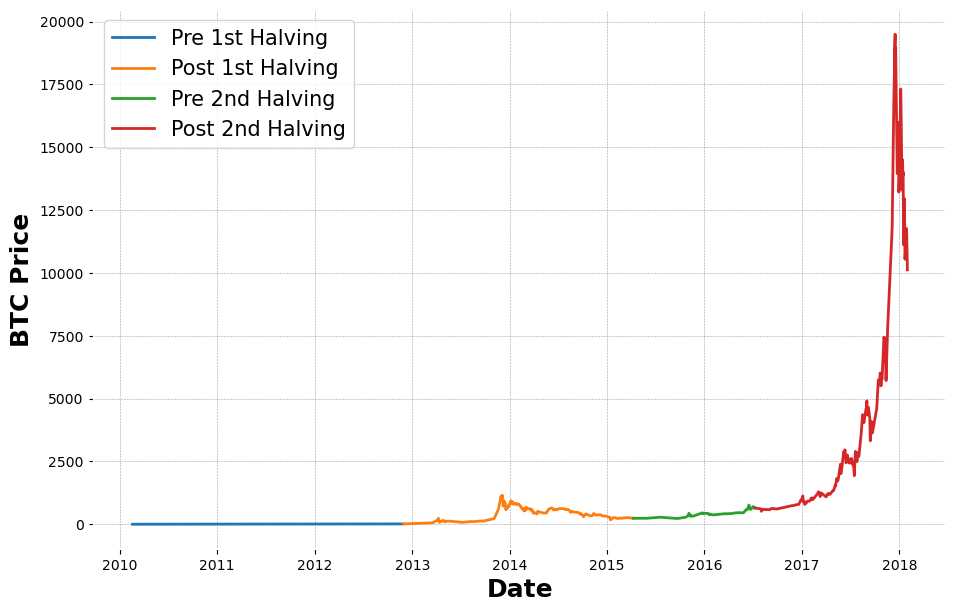

In [133]:
#Fem un primer plot de la gráfica separant els periodes de temps
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.lineplot(data = btc,x='Date',y='btc_market_price',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('BTC Price', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

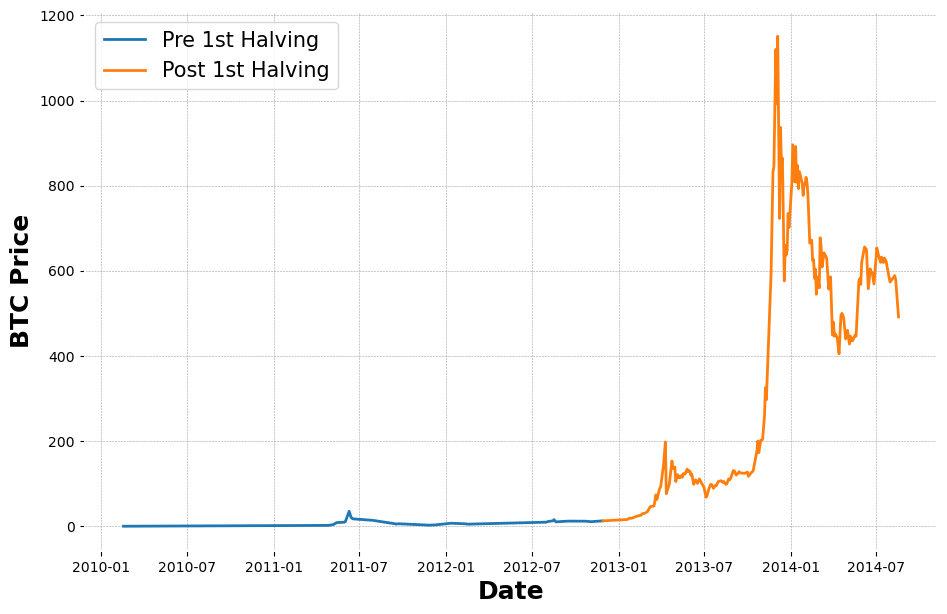

In [134]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.lineplot(data = df_btc,x='Date',y='btc_market_price',hue='Time_period')
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('BTC Price', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

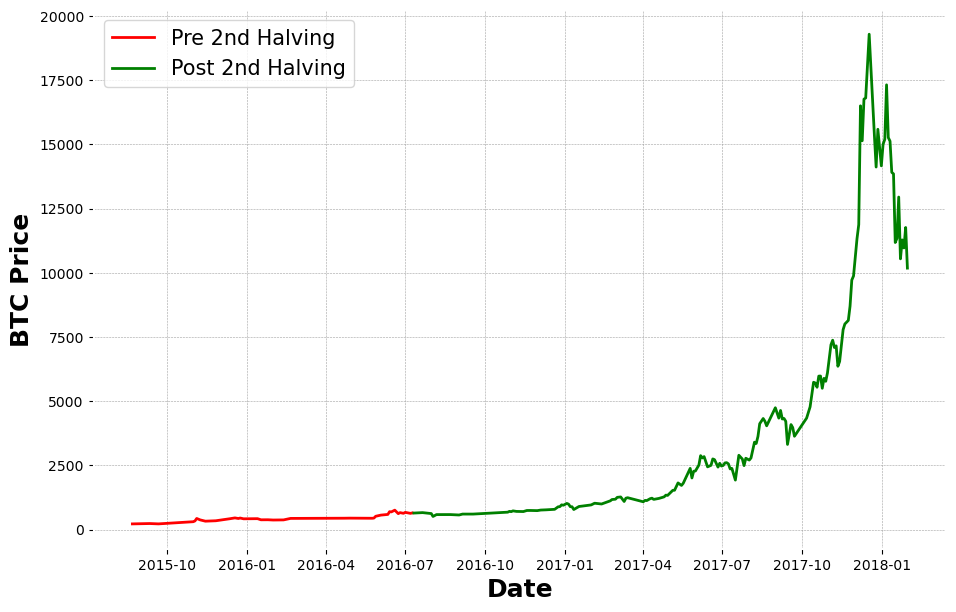

In [135]:
fig, scatter = plt.subplots(figsize = (11,7))
scatter = sns.lineplot(data = df_btc2,x='Date',y='btc_market_price',hue='Time_period', palette=['red','green'])
scatter.set_xlabel('Date', fontsize = 18)
scatter.set_ylabel ('BTC Price', fontsize = 18)
scatter.legend(loc='upper left', fontsize = 15);

# Correlation Matrix

In [148]:
#Importem les llibreries necessaries per dur a terme la visualització
import matplotlib.pyplot as plt
from vega_datasets import data

In [166]:
#Importem el dataset cars i escollim les columnes quantitatives d'aquest
cars=data.cars()
cars=cars[['Cylinders', 'Displacement', 'Horsepower','Weight_in_lbs', 'Acceleration']]
cars['Acceleration'] = -cars['Acceleration']
cars.dropna(inplace=True)
cars.reset_index(inplace=True, drop=True)
cars.head()

,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
0,8,307.0,130.0,3504,-12.0
1,8,350.0,165.0,3693,-11.5
2,8,318.0,150.0,3436,-11.0
3,8,304.0,150.0,3433,-12.0
4,8,302.0,140.0,3449,-10.5


<AxesSubplot:>

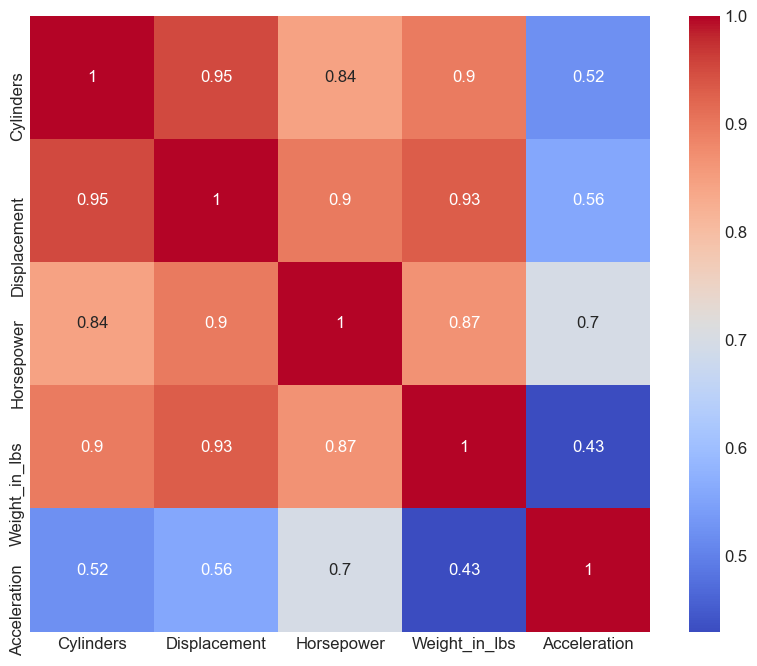

In [165]:
#Segona representació
plt.figure(figsize=(10,8))
sns.heatmap(cars.corr(), annot=True, cmap='coolwarm')

#  OHLC Chart

In [123]:
%matplotlib inline
import mplfinance as mpf

In [168]:
sp = pd.read_csv('Stock_Data.csv')
sp = sp[sp['symbol']=='MMM']
sp = sp[sp['Date']>='2008-09-10']
sp = sp[sp['Date']<'2008-10-01']
sp.reset_index(inplace=True, drop=True)
sp.Date = pd.to_datetime(sp.Date)
sp = sp.set_index('Date')
sp.head()

,symbol,Low,High,Close,Open,Volume
Date,,,,,,
2008-09-10,MMM,68.4900,70.12,68.68,69.97,5740900.0
2008-09-11,MMM,68.1800,70.07,69.94,68.24,5187100.0
2008-09-12,MMM,69.2506,70.48,70.15,69.85,5702000.0
2008-09-15,MMM,68.0100,70.25,68.88,68.02,6903900.0
2008-09-16,MMM,68.3200,70.32,69.73,68.47,8718800.0


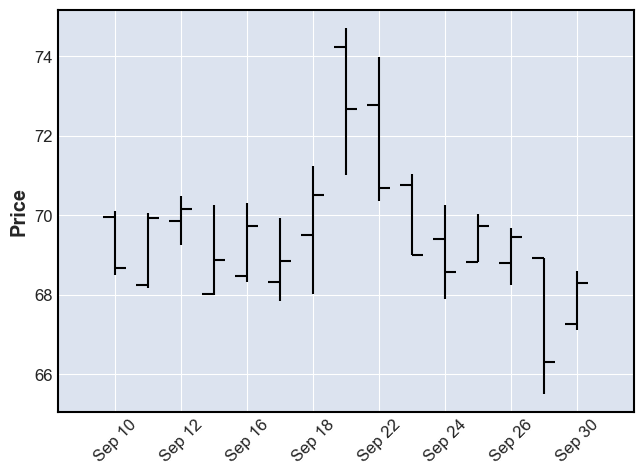

In [147]:
mpf.plot(sp)

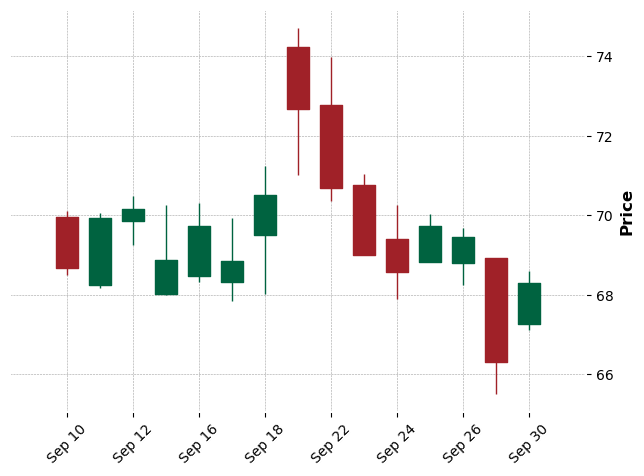

In [125]:
mpf.plot(sp,type='candle',style='charles')